<div class="alert alert-block alert-success">
    <span style='color:;font-size: 30px'><center><b>Solve Toxic Comment Problem using Artificial Intelligence</b></center> </span>
</div>


<div class="alert alert-block alert-info">
    <b> Downloading requied libraries </b> 
</div>

In [1]:
# Download SpaCy, PyTorch

In [2]:
!pip install spacy

In [3]:
!python -m spacy download en_core_web_sm

In [4]:
!pip install wordcloud

In [5]:
!pip install torch torchvision

In [6]:
!pip install transformers        

In [8]:
!pip install contractions

In [9]:
!pip install xgboost

In [10]:
# # need scikit-multilearn library for multi-label classification

!pip install scikit-learn
!pip install scikit-multilearn

In [11]:
!pip install gradio

<div class="alert alert-block alert-info">
    <b> 1. Import basic libraries </b> 
</div>

In [15]:
import pandas as pd
import numpy as np
import string

#to avoid warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.exceptions import UndefinedMetricWarning


<div class="alert alert-block alert-info">
    <b> 2. Load the Dataset </b> 
</div>


In [16]:
# Load the Kaggle Toxic Comment Classification dataset

df = pd.read_csv('train.csv')


In [17]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [18]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [19]:
# Get the shape of the dataset (number of rows and columns)
print("shape of the dataset:",df.shape)

shape of the dataset: (159571, 8)


In [20]:
# Checking for NAN values
print("============================================================")
print("NAN values are available:",df.isnull().values.any())
print("============================================================")
print("There are \n\n", df.isnull().sum(), "\n\nValues in the Dataset")
print("============================================================")

NAN values are available: False
There are 

 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64 

Values in the Dataset


In [21]:
#checking for missing values 

df.isnull().values.any() 


False

In [22]:
#checking for duplicates

df.duplicated().values.any()

False

In [23]:
# Get the basic statistics of the numerical columns

df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.info()               # to display information about the DataFrame's columns, data types, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Visualization of dataset

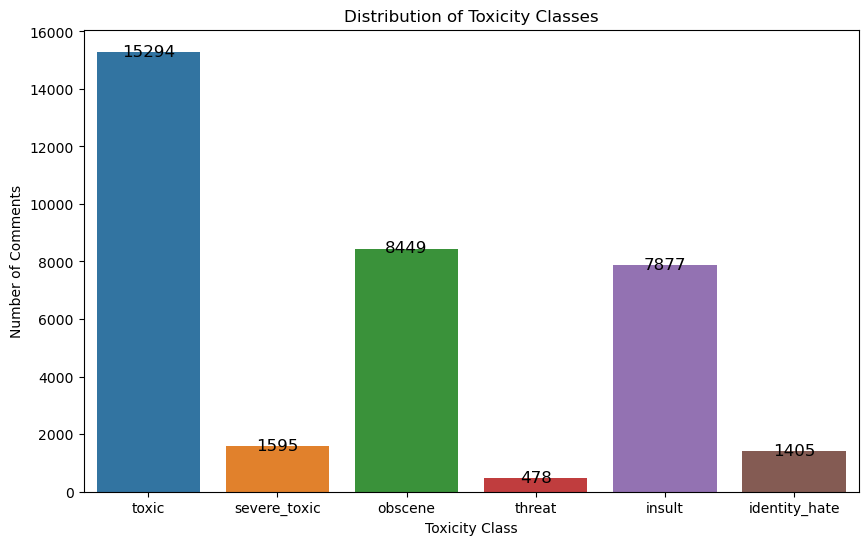

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of comments in each class
class_counts = df.iloc[:, 2:].sum()

# Plot the class distribution using a bar plot
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=class_counts.index, y=class_counts.values)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha='center', va='center', fontsize=12, color='black')

plt.xlabel("Toxicity Class")
plt.ylabel("Number of Comments")
plt.title("Distribution of Toxicity Classes")

plt.show()

In [26]:
column_labels = df.columns.tolist()[2:]
df[column_labels].sum().sort_values()

threat             478
identity_hate     1405
severe_toxic      1595
insult            7877
obscene           8449
toxic            15294
dtype: int64

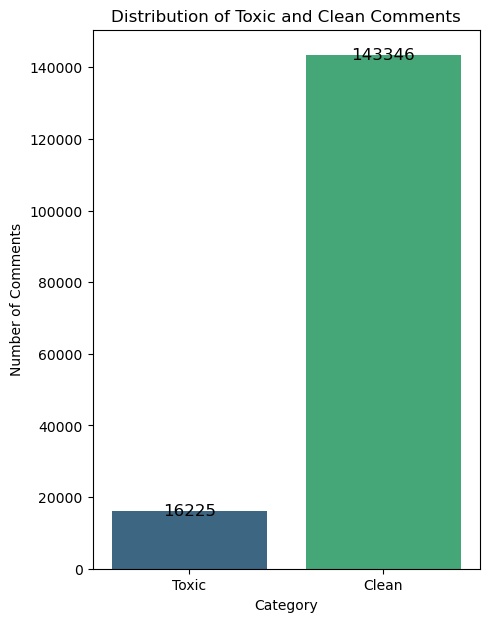

In [27]:
# Create subsets based on toxic and clean comments
train_toxic = df[df[column_labels].sum(axis=1) > 0]
train_clean = df[df[column_labels].sum(axis=1) == 0]

# Number of toxic and clean comments
num_toxic = len(train_toxic)
num_clean = len(train_clean)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({'Category': ['Toxic', 'Clean'], 'Count': [num_toxic, num_clean]})

# Create a black background for the plot
plt.figure(figsize=(5, 7))

# Vertical bar plot
ax = sns.barplot(x='Category', y='Count', data=plot_data, palette='viridis')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha='center', va='center', fontsize=12, color='black')

# Add labels and title to the plot
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxic and Clean Comments')

# Show the plot
plt.show()


In [28]:
print(train_toxic.shape)
print(train_clean.shape)

(16225, 8)
(143346, 8)


from above plot, we can say that our dataset in imbalance

# Handling imbalance dataset
To handle the imbalanced data, we can create a new training set in which the number of toxic comments remains the same, and to match that, we will randomly sample 22000 clean comments and include them in the training set.

In [29]:
# Randomly sample clean comments

train_clean_sampled = train_clean.sample(n=22000, replace=True, random_state=42)

# Combine the toxic and sampled clean comments
df = pd.concat([train_toxic, train_clean_sampled], axis=0)
 
# Shuffle the data to avoid any order bias during training
df = df.sample(frac=1, random_state=42)

In [30]:
print(train_toxic.shape)
print(train_clean_sampled.shape)
print(df.shape)

(16225, 8)
(22000, 8)
(38225, 8)


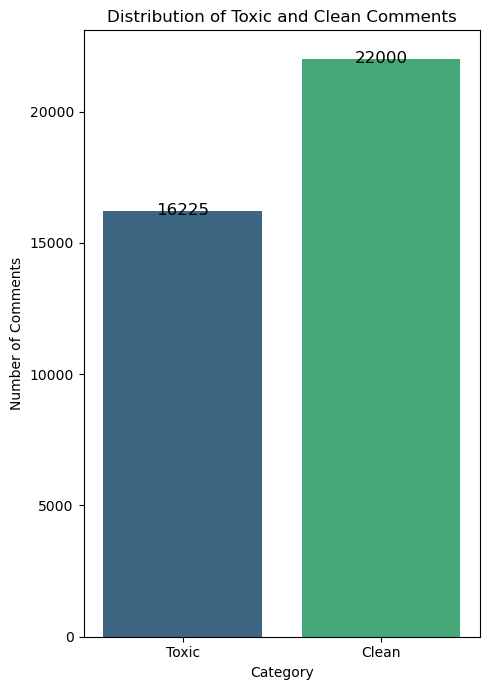

In [31]:
# Create subsets based on toxic and clean comments
train_toxic = df[df[column_labels].sum(axis=1) > 0]
train_clean = df[df[column_labels].sum(axis=1) == 0]

# Number of toxic and clean comments
num_toxic = len(train_toxic)
num_clean = len(train_clean)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({'Category': ['Toxic', 'Clean'], 'Count': [num_toxic, num_clean]})

# Create a black background for the plot
plt.figure(figsize=(5, 7))

# Vertical bar plot
ax = sns.barplot(x='Category', y='Count', data=plot_data, palette='viridis')

# Add labels and title to the plot
plt.ylabel('Number of Comments')
plt.xlabel('Category')
plt.title('Distribution of Toxic and Clean Comments')

# Add total count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()

# Show the plot
plt.show()



<div class="alert alert-block alert-info">
    <b> 3. Data Preprocessing </b> 
</div>
 


#### Preprocess the Data (removing punctuation, converting text to lowercase, tokenizing, removing stop words, lemmatizing the words etc.)

In [33]:
import re
import string
import contractions
import spacy
from wordcloud import STOPWORDS


# Load spaCy for stop words and lemmatization
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words.union(STOPWORDS)
final_stop_words = list(stop_words) + ["mr","mrs", "miss","hi","hello","hey","seven","let","etc","okay","lol","rofl", "hola"]

# Function to remove HTML tags
def remove_html_tags(text):
    return re.sub(r"<.*?>", " ", text)

# Function to remove links
def remove_links(text):
    text = re.sub(r"http\S+", " ", text, flags=re.MULTILINE)
    return re.sub(r"www\S+", " ", text, flags=re.MULTILINE)

# Function to remove escape characters
def remove_escape_char(text):
    return re.sub(r"[\n\t\\\/]", " ", text, flags=re.MULTILINE)

def keep_alpha_and_underscore(text):
    return re.sub(r"[^a-zA-Z_]"," ",text,flags=re.MULTILINE)

def remove_duplicate_words(text):
    words = text.split()  # Split the text into words
    unique_words = []

    for word in words:
        if word not in unique_words:
            unique_words.append(word)
    return " ".join(unique_words)

# Function to remove words with length upto 2
def remove_words_upto2(text):
    return re.sub(r'\b\w{1,2}\b', " ", text)

def remove_extra_spaces_if_any(text):
    """function to remove extra spaces equals to 2 or more"""
    return re.sub(r" {2,}", " ", text, flags=re.MULTILINE)

# Function to handle contractions
def decontraction(text):
    """dealing with letters that are omitted and replaced with an apostrophe"""
    res = ""
    for word in text.split():
        try:
            con_text = contractions.fix(word)
            if con_text.lower() == word.lower():
                res += word + " "
            else:
                res += con_text + " "
        except:
            con_text = contractions.fix(word.lower())
            if con_text.lower() == word.lower():
                res += word + " "
            else:
                res += con_text + " "
    return res.strip()


In [34]:
# Function to preprocess text
def preprocessing(text):
    text = remove_links(text)
    text = remove_html_tags(text)
    text = remove_escape_char(text)
    text = re.sub(r'\d+', '', text)                                            # Remove digits
    text = decontraction(text)
    text = "".join([char for char in text if char not in string.punctuation])  # Remove punctuation

    text = text.lower()                                                        # Convert text to lowercase
    text = remove_duplicate_words(text)
    
    # Tokenize and remove stopwords and POS from the cleaned text using spaCy
    text = ' '.join(token.text for token in nlp(text) if token.text.lower() not in final_stop_words)
    text = keep_alpha_and_underscore(text)
    text = remove_extra_spaces_if_any(text)
    text = remove_words_upto2(text)    
        
    # Tokenize and remove stopwords from the cleaned text using spaCy
    tokens = [token.text for token in nlp(text) if token.text.lower() not in final_stop_words]

    # Lemmatization using spaCy
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

    return " ".join(lemmatized_tokens)  # Combine lemmatized tokens back into text


In [35]:
# Apply preprocessing and stemming to the 'comment_text' column
df['cleaned_text'] = df['comment_text'].apply(preprocessing)

In [36]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_text
57362,996176e13cbf743a,Lua? \n\nI think Lua should be mentioned under...,0,0,0,0,0,0,lua think mention notable homebrew definately ...
37417,63e5ef8914537d99,My name is Terry-Jo Howard and I am the lady i...,0,0,0,0,0,0,terryjo howard lady article discrepancy articl...
1867,050c330758a40c44,"""=Reliable sources===\nCheating:\n""""Barry Bond...",0,0,1,0,1,0,reliable source cheat barry bondscheater cbs y...
154363,acf03fb0079ab2ea,MONKEY MONKEY MONKEY MONKEY MONKEY MONKEY,1,0,0,0,0,0,monkey
47620,7f37081708bf0d2f,how on earth is it vandalism when i'm correcti...,1,0,0,0,1,0,earth vandalism correct mistake listen talk br...
...,...,...,...,...,...,...,...,...,...
61017,a3621817ec94f22c,See how the comment was about cencorship? And ...,1,0,0,0,0,0,comment cencorship straight cencor make look i...
110612,4fb6da5f08c6718e,then how come he is allways refered to as a se...,1,0,1,0,1,0,come allway refer serial killer ass hole
5698,0f40cd5b7f104497,|decline=Please provide contact information fo...,0,0,0,0,0,0,declineplease provide contact information admi...
8141,15abaa783a453d4f,"Useless piece of shit \n\nYou're an asshole, y...",1,1,1,0,1,0,useless piece shit asshole life instead delete...


## Probability Density Function

PDF shows the distribution of the number of words in comment text for each class (class 0 and class 1) of your target labels.

In [37]:
class_0=[]
class_1=[]

plt.figure(figsize=(20, 10))
count = 1
for col in df.columns[2:8]:
    toxic_class_0 = df[df[col] == 0]['cleaned_text'].str.split().apply(len)
    toxic_class_0_count = toxic_class_0.values
    class_0.append(toxic_class_0_count)
    
    toxic_class_1 = df[df[col] == 1]['cleaned_text'].str.split().apply(len)
    toxic_class_1_count = toxic_class_1.values
    class_1.append(toxic_class_1_count)
    

<Figure size 2000x1000 with 0 Axes>

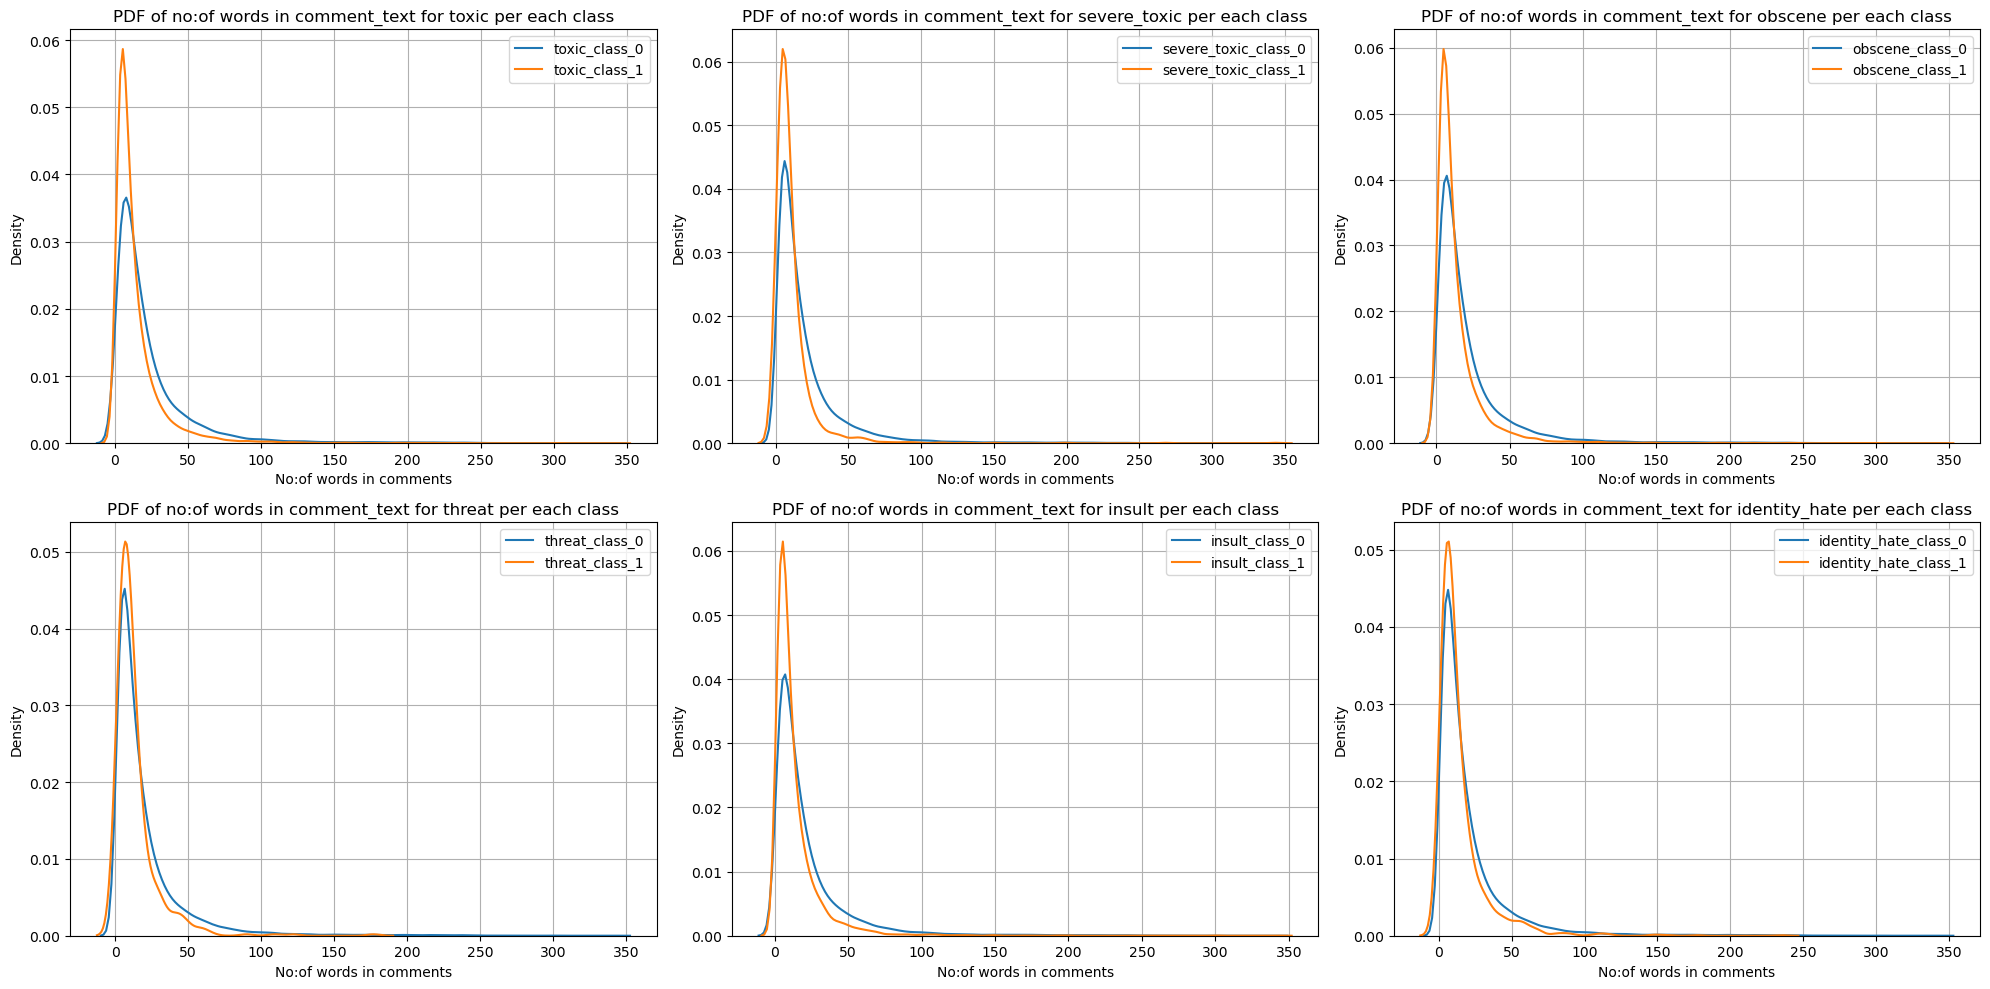

In [38]:
plt.figure(figsize=(20,10))
count=1
for col in df.columns[2:8]:
    plt.subplot(2,3,count)
    sns.distplot(class_0[count-1], hist=False, label=str(col)+'_class_0')
    sns.distplot(class_1[count-1], hist=False, label=str(col)+'_class_1')
    plt.title('PDF of no:of words in comment_text for '+str(col)+' per each class')
    plt.xlabel('No:of words in comments')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    count=count+1
plt.show()

Distribution of no: of words in comment_text for all the target labels per class is overlaping.

So, from above it is clear that there is no clear seperation between class-0/class-1 for any of the target labels.

Class-0 is dominating in most of the distribution plots.

#### After all the study between no: of words in comment_text & target labels, it doesn't play any major role in classification as all of the density plots for toxic & non-toxic are overlapping each other.

let us plot the graph on the comment_text feature in order to bring the most common/occuring word under each target and each class.

<Figure size 2000x2000 with 0 Axes>

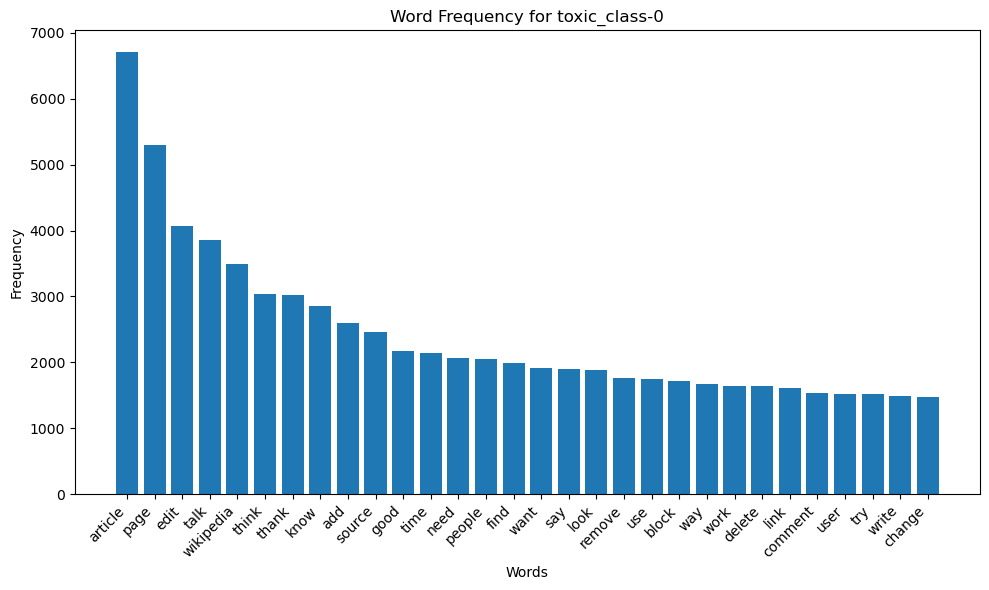

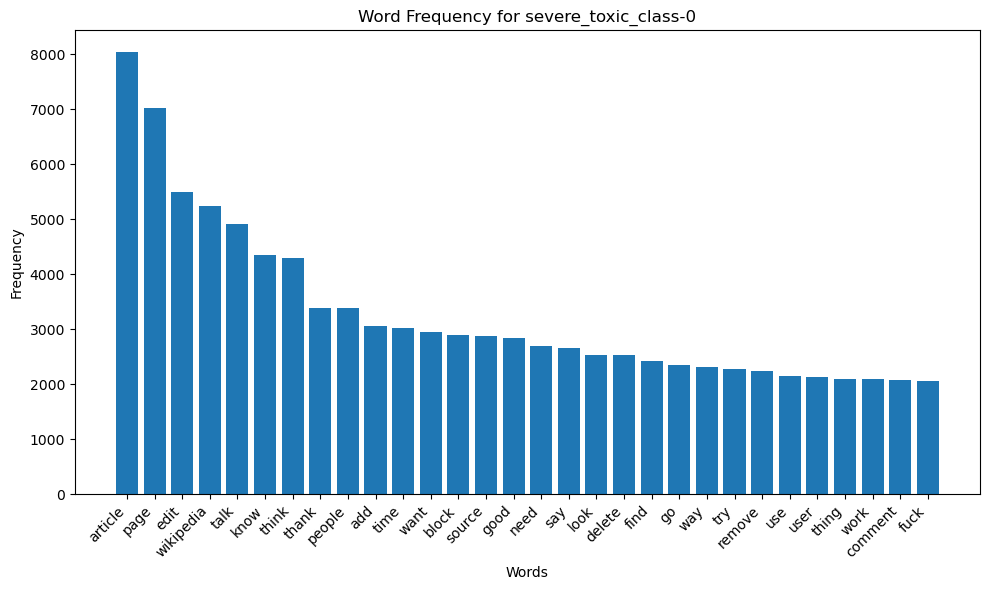

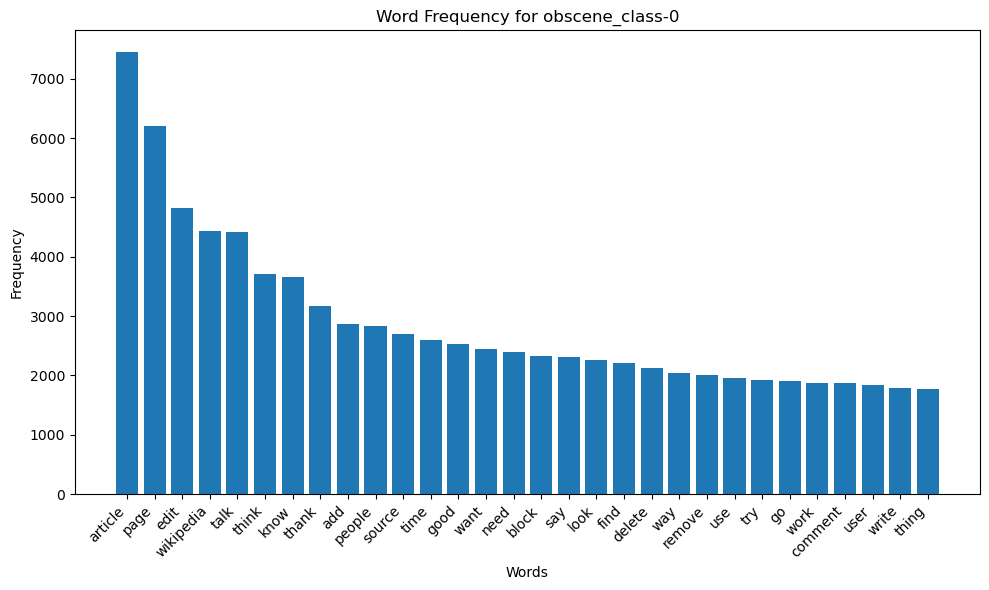

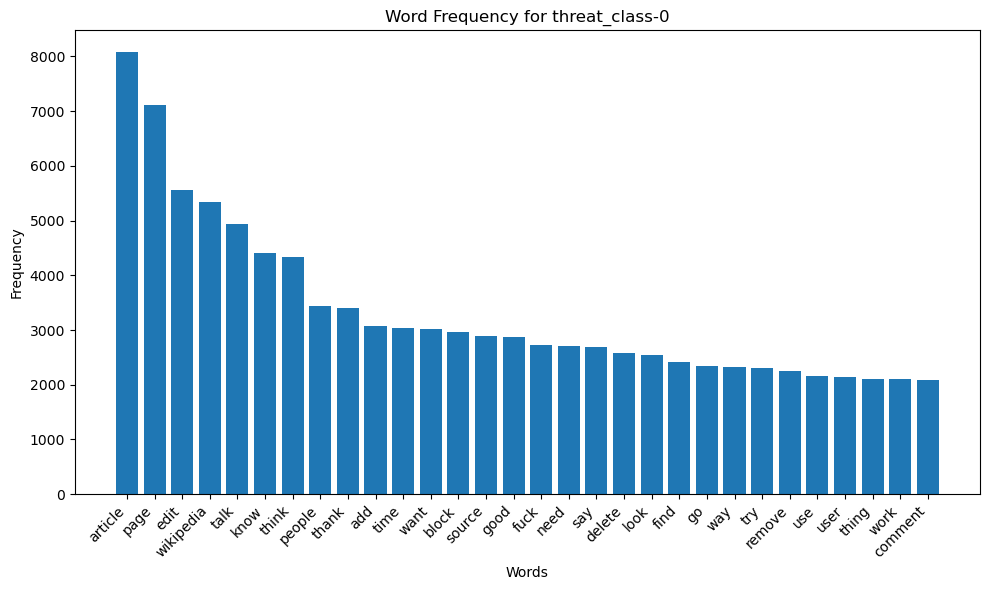

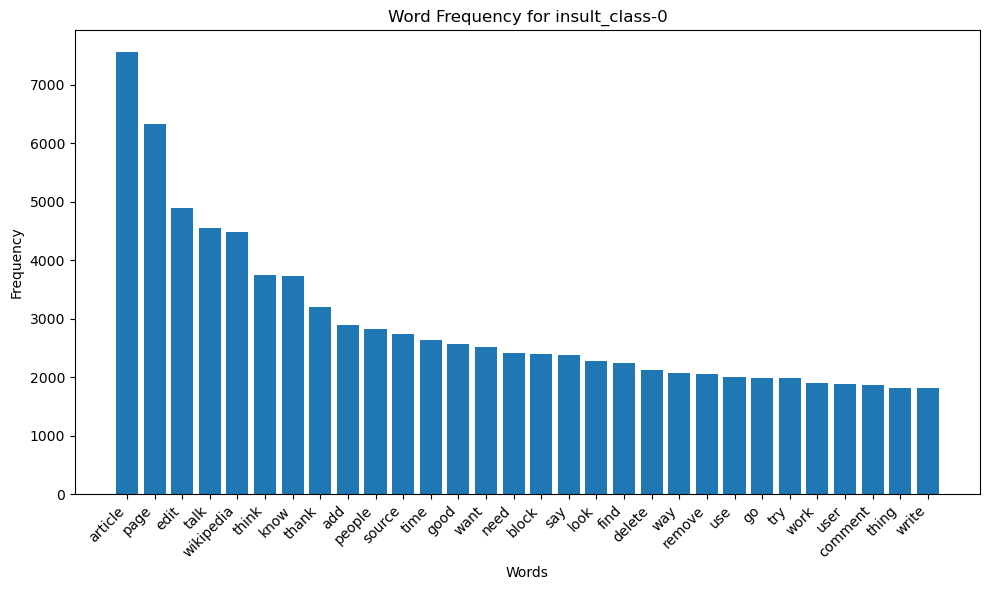

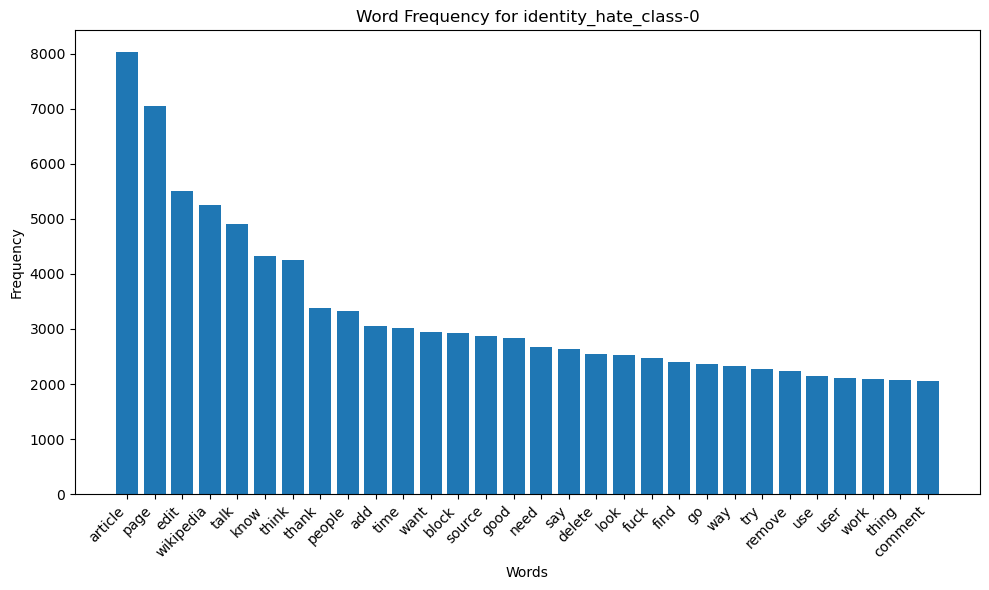

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

# Create a function to generate and visualize word frequency plots
def generate_word_frequency_plot(text_data, title):
    words = " ".join(text_data).split()
    word_counter = Counter(words)
    common_words = word_counter.most_common(30)
    
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in common_words], [count[1] for count in common_words])
    plt.xticks(rotation=45, ha= "right")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Create subplots for word frequency plots
plt.figure(figsize=(20, 20))
count = 1
for col in df.columns[2:]:
    if count != 7:  # Skip the 7th plot
        toxic_class_0 = df[df[col] == 0]['cleaned_text'].str.lower().values
        title = "Word Frequency for " + col + "_class-0"
        generate_word_frequency_plot(toxic_class_0, title)
    
    count += 1

plt.tight_layout()
plt.show()


<Figure size 2000x2000 with 0 Axes>

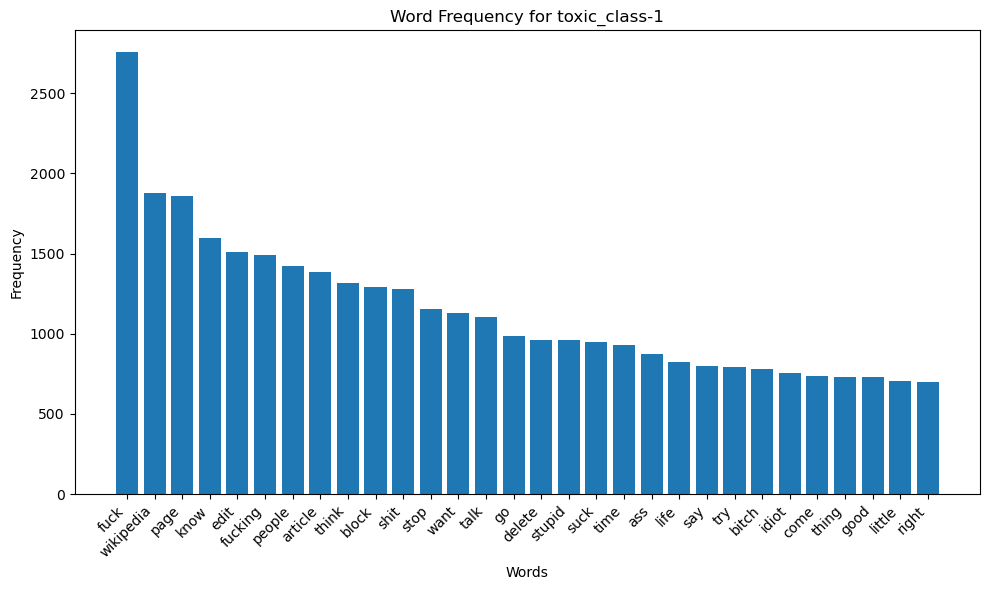

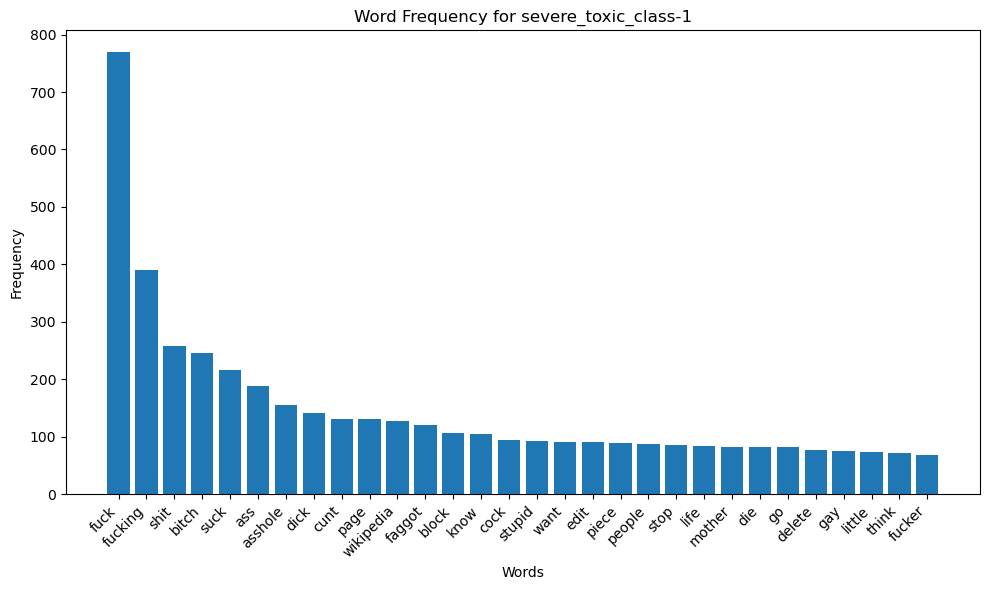

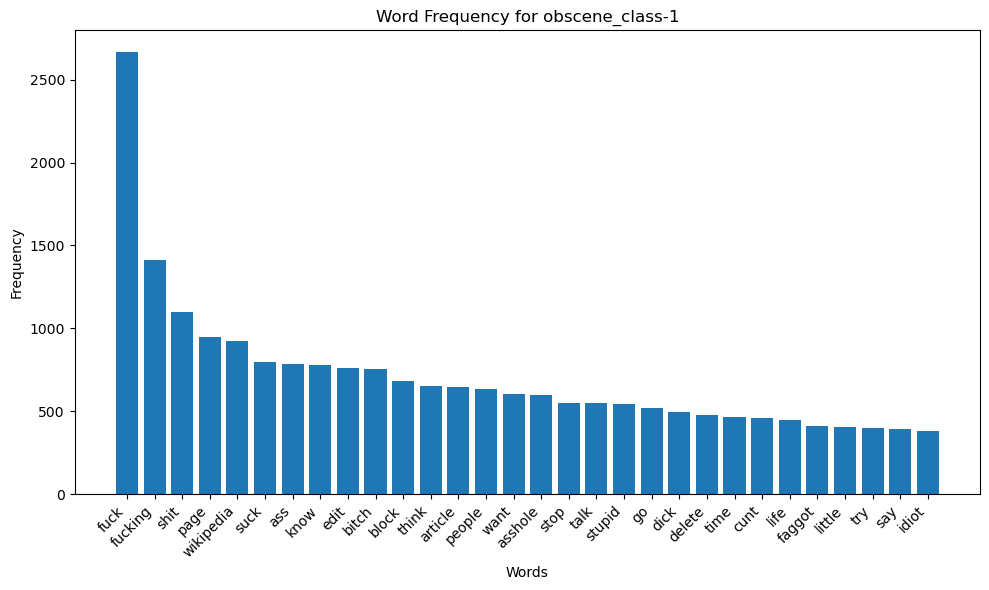

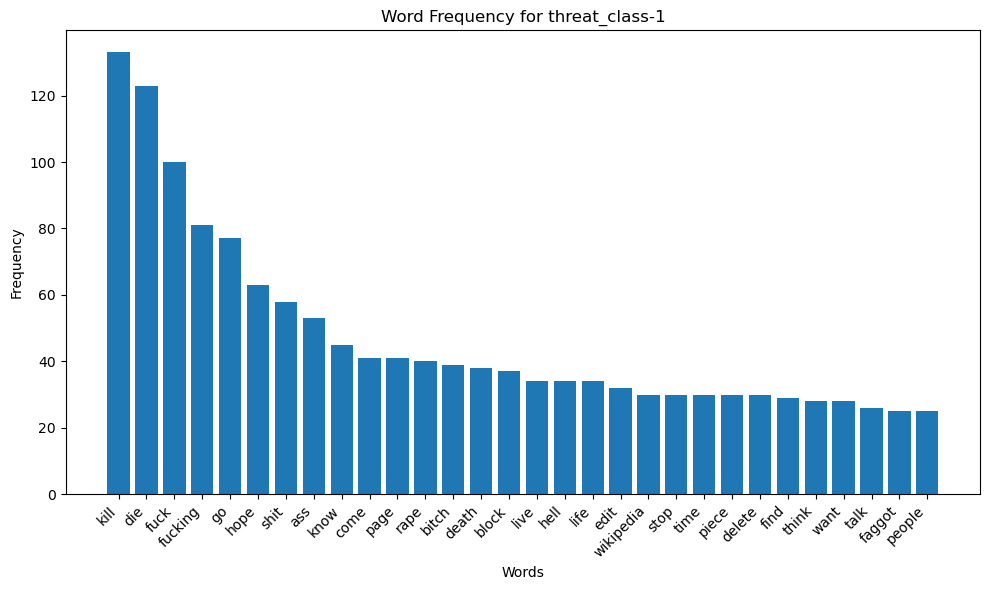

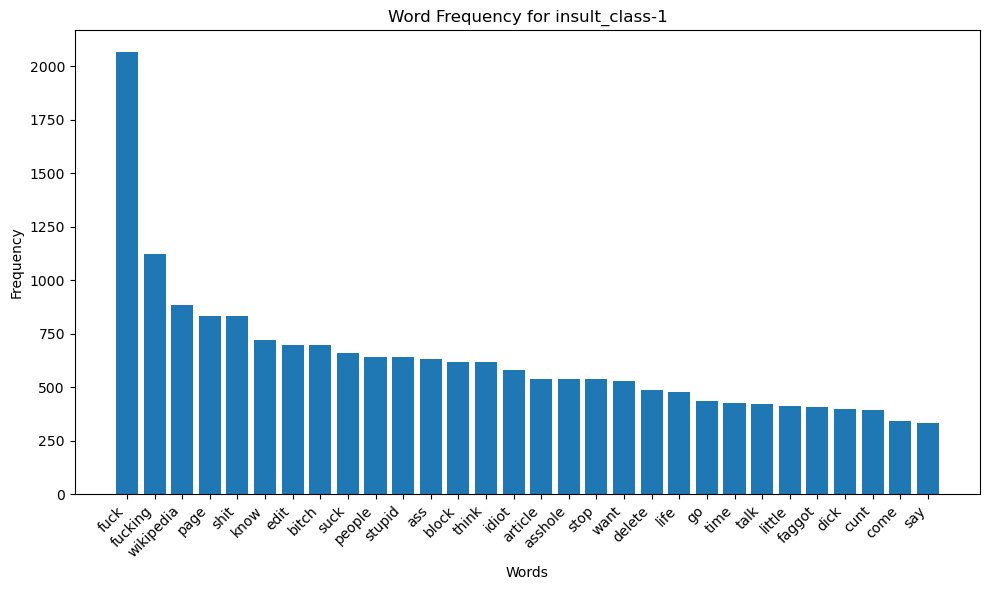

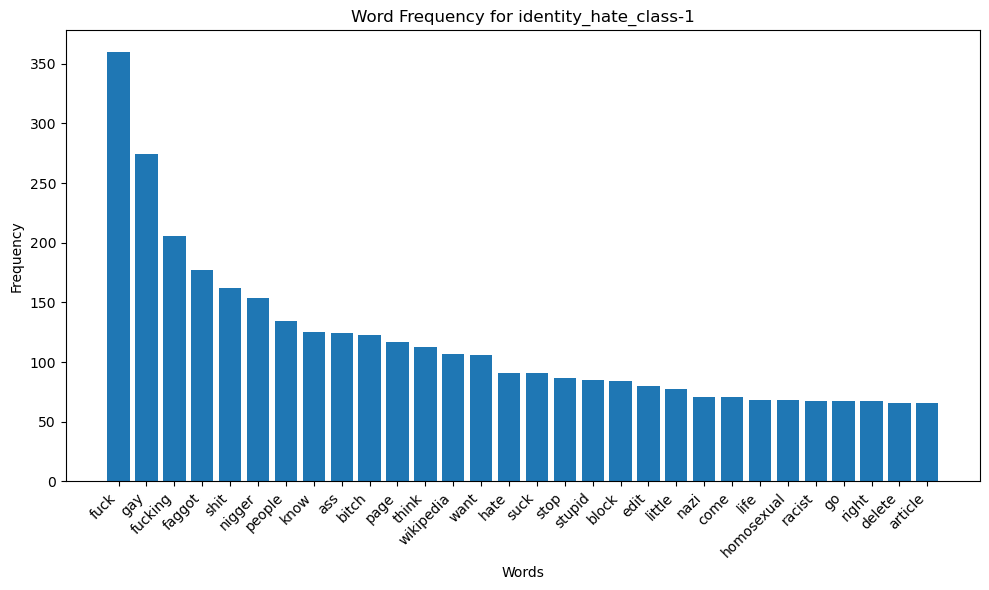

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
from collections import Counter

# Create a function to generate and visualize word frequency plots
def generate_word_frequency_plot(text_data, title):
    words = " ".join(text_data).split()
    word_counter = Counter(words)
    common_words = word_counter.most_common(30)
    
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in common_words], [count[1] for count in common_words])
    plt.xticks(rotation=45, ha="right")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Create subplots for word frequency plots
plt.figure(figsize=(20, 20))
count = 1
for col in df.columns[2:]:
    if count != 7:                                       # Skip the 7th plot
        toxic_class_1 = df[df[col] == 1]['cleaned_text'].str.lower().values
        title = "Word Frequency for " + col + "_class-1"
        generate_word_frequency_plot(toxic_class_1, title)
    
    count += 1

plt.tight_layout()
plt.show()


In [76]:
df['comment_text'] = df['cleaned_text']
processed_comment_df = df['comment_text'].to_list()
processed_comment_df

['lua think mention notable homebrew definately importance game application release familiar program history willing add',
 'terryjo howard lady article discrepancy article wish discussion jimmy release prison work release skip come miami hurricane andrew meet tampa clearwater area prostitute pick believe kill causious think amuse tell sick life want clean say stay get living room floor week tell thing write know woman die eye breath chock day     vertic prove probably kill accidently revive rape body violently start heart blood incident spell bad educate include james randall real michael sincerely',
 'reliable source cheat barry bondscheater cbs yea kind think dear bond outright cheater stupid usa today yes bad sort lie clear liar new york daily news pretty freakin source lamar bad man baseball digest whiner influence americas youth mark barne',
 'monkey',
 'earth vandalism correct mistake listen talk brick wall',
 'fair think mean talkcontrib',
 'recap gibraltarpedia controversy bre

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
processed_df = df.drop(columns=["id", "cleaned_text"])
processed_df = processed_df.iloc[:-1]
processed_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
57362,lua think mention notable homebrew definately ...,0,0,0,0,0,0
37417,terryjo howard lady article discrepancy articl...,0,0,0,0,0,0
1867,reliable source cheat barry bondscheater cbs y...,0,0,1,0,1,0
154363,monkey,1,0,0,0,0,0
47620,earth vandalism correct mistake listen talk br...,1,0,0,0,1,0
...,...,...,...,...,...,...,...
27078,sigh acceptable give idea unblock frightner se...,0,0,0,0,0,0
61017,comment cencorship straight cencor make look i...,1,0,0,0,0,0
110612,come allway refer serial killer ass hole,1,0,1,0,1,0
5698,declineplease provide contact information admi...,0,0,0,0,0,0


In [48]:
processed_df.isnull().values.any()

False

<div class="alert alert-block alert-info">
    <b> 4. Splitting the Dataset </b> 
</div>


Splitting the dataset into training and testing sets before vectorization is a common and recommended approach. This ensures that your vectorization is done on the training data only and then applied consistently to both the training and testing data.

This is a good practice to follow as it prevents data leakage and ensures that your vectorization process is representative of real-world scenarios where you apply your model to unseen data.

In [51]:
# # Split the data into training and testing sets
from skmultilearn.model_selection import iterative_train_test_split

# Split the data into training and testing sets

X = processed_df['comment_text']
y = processed_df.drop(columns=['comment_text'])

X_train, y_train, X_test, y_test = iterative_train_test_split(X.values.reshape(-1, 1), y.values, test_size=0.2)

#validation set
test_texts, val_texts, test_labels, val_labels = iterative_train_test_split(X_test, y_test, test_size=0.5)


In [52]:
#re-mapping to original shape

X_train = X_train.reshape(X_train.shape[0],)
X_test = X_test.reshape(X_test.shape[0],)

In [53]:
print("Shape of X-Train", X_train.shape)
print("Shape of X-Test", X_test.shape)
print("Shape of y-Train", y_train.shape)
print("Shape of y-Test", y_test.shape)
print("Shape of val_labels", val_labels.shape)

Shape of X-Train (30579,)
Shape of X-Test (7645,)
Shape of y-Train (30579, 6)
Shape of y-Test (7645, 6)
Shape of val_labels (3823, 6)



<div class="alert alert-block alert-info">
    <b> 5. Vectorization using TF-IDF weighted Avg Word2Vec </b> 
</div>
 

TF-IDF is unable to catch the scemantic meanings in a given input. so we will be using TF-IDF weighted Avg W2V for featurization with the help of Glove Model

In [54]:
# Glove gives output of 300 dimensions
# loading words and their corresponding w2v representation.
 
w2v_dict = dict()
with open('glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')     
        w2v_dict[word] = vec

print('Loaded %s word vectors.' % len(w2v_dict))
w2v_words =  set(w2v_dict.keys())

Loaded 400000 word vectors.


In [55]:
# TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,1), stop_words=final_stop_words, use_idf=True)
vectorizer.fit_transform(X_train)

# we are converting a dictionary with word as a key, and the idf as a value

tfidf_dict = dict(zip(vectorizer.get_feature_names_out(), list(vectorizer.idf_)))
tfidf_words = set(vectorizer.get_feature_names_out())

In [56]:
from tqdm.notebook import tqdm               # for progress bar

# computing tf-idf weighted word2vec for each comment.

def compute_tfidf_weighted_w2v(data,w2v_words,tfidf_words,w2v_dict,tfidf_dict):
    
    tfidf_w2v = []
    for sentence in tqdm(data):
        vector = np.zeros(300) 
        # as word vectors are of zero length
        tf_idf_weight =0;
        
        # num of words with a valid vector in the sentence/review
        try:
            for word in sentence.split():
                # for each word in a review/sentence
                if (word in w2v_words) and (word in tfidf_words):
                    vec = w2v_dict[word] 
                    
                    # getting the vector for each word
                    tf_idf = tfidf_dict[word]*(sentence.count(word)/len(sentence.split()))
                    
                    # getting the tfidf value for each word
                    vector += (vec * tf_idf) # calculating tfidf weighted w2v
                    tf_idf_weight += tf_idf
        except:
            tf_idf_weight = 0
            
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v.append(vector)
    return np.array(tfidf_w2v)

In [57]:
X_train_tfidf_w2v = compute_tfidf_weighted_w2v(X_train,w2v_words,tfidf_words,w2v_dict,tfidf_dict)
X_test_tfidf_w2v = compute_tfidf_weighted_w2v(X_test,w2v_words,tfidf_words,w2v_dict,tfidf_dict)

  0%|          | 0/30579 [00:00<?, ?it/s]

  0%|          | 0/7645 [00:00<?, ?it/s]

In [58]:
print("Shape of X-Train data after vectorisation =", X_train_tfidf_w2v.shape)
print("Shape of X-Test data after vectorisation =", X_test_tfidf_w2v.shape)
print("Shape of y-train data after vectorisation =", y_train.shape)
print("Shape of y-test data after vectorisation =", y_test.shape)

Shape of X-Train data after vectorisation = (30579, 300)
Shape of X-Test data after vectorisation = (7645, 300)
Shape of y-train data after vectorisation = (30579, 6)
Shape of y-test data after vectorisation = (7645, 6)


In [59]:
X_train_tfidf_w2v

array([[ 0.02254087,  0.11009533,  0.00629965, ..., -0.11093498,
        -0.0315833 , -0.02790724],
       [-0.06566328,  0.03008797, -0.11974093, ...,  0.01133075,
        -0.13407296,  0.17982728],
       [ 0.09650994, -0.03186719, -0.07341622, ..., -0.17502553,
         0.23930484,  0.50674795],
       ...,
       [ 0.08026441, -0.11713009, -0.23100705, ..., -0.14423402,
         0.06536724,  0.09052195],
       [-0.10545642,  0.06963794, -0.27661298, ...,  0.1010564 ,
         0.16734536,  0.09113844],
       [ 0.00709669, -0.11648287, -0.26502033, ...,  0.00900907,
        -0.04996418, -0.07994461]])

In [108]:
y_train

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0]])



<div class="alert alert-block alert-info">
    <b> 6. Build and Train Machine Learning Model </b> 
</div>


In [60]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain

####  Problem Transformation approach to solve a multi-label classification problem
In this approach we are transforming multi-label classification task into single-label classification task.

In detail, we are converting/tranforming multi-label classification problem into known classifiaction techniques ie transforming multi-label task into different sets of binary class classification task (1 binary classifiaction task-per 1 label) or multi-class classifiaction on a whole.

There are different strategies to convert multi-label to single label as follows.

#### 1.1. Binary Relevance

#### 1.2. Classifier Chains

#### 1.1 Binary Relevance
Binary Relevance is the simplest technique, which basically treats each target label as a separate single Binary class classification problem.

In [61]:
clf_list=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]

acc=[]
ham_loss=[]
logloss=[]


for base_clf in tqdm(clf_list):
    clf = BinaryRelevance(base_clf)
    clf.fit(X_train_tfidf_w2v, y_train)
    pred = clf.predict(X_test_tfidf_w2v)

    acc.append(accuracy_score(y_test,pred))

    ham_loss.append(hamming_loss(y_test,pred))
    logloss.append(log_loss(y_test,pred.A))       #.A attribute is used to convert a sparse matrix to a dense NumPy array.


bin_rel_res=pd.DataFrame(columns=['Classifier','Accuracy','Hamming-Loss','Log-Loss'])
bin_rel_res['Classifier']=['Gaussian NB','Logistic Regression','Decision Tree','Random Forest','XGBoost']
bin_rel_res['Accuracy']=acc
bin_rel_res['Hamming-Loss']=ham_loss
bin_rel_res['Log-Loss']=logloss

bin_rel_res

  0%|          | 0/5 [00:00<?, ?it/s]

,Classifier,Accuracy,Hamming-Loss,Log-Loss
0,Gaussian NB,0.500196,0.195640,3.703410
1,Logistic Regression,0.662655,0.083410,8.169122
2,Decision Tree,0.490517,0.132614,10.339158
3,Random Forest,0.666841,0.084500,8.781125
4,XGBoost,0.671550,0.077829,7.286242


### 1.2 Classifier Chains

Classifier Chains is another simple technique, unlike Binary Relevance Classifier Chain preserves the relationship between the features. The operation of classifier chain works as follows...

classifier-1 will takes all the inputs and fits on the first target labels alone and the classifier-2 takes all the inputs and the first target labels together and fit on the 2nd label. Classifier-3 takes all the inputs and the first, second target labels all together as input and fits on the 3rd target label. and so on

Generalizing the folow as the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain

In [62]:
clf_list=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]

acc=[]
ham_loss=[]
logloss=[]


for base_clf in tqdm(clf_list):
    clf = ClassifierChain(base_clf)
    clf.fit(X_train_tfidf_w2v, y_train)
    pred = clf.predict(X_test_tfidf_w2v)

    acc.append(accuracy_score(y_test,pred))

    ham_loss.append(hamming_loss(y_test,pred))
    logloss.append(log_loss(y_test,pred.A))

clf_chain_res=pd.DataFrame(columns=['Classifier','Accuracy','Hamming-Loss','Log-Loss'])
clf_chain_res['Classifier']=['Gaussian NB','Logistic Regression','Decision Tree','Random Forest','XGBoost']
clf_chain_res['Accuracy']=acc
clf_chain_res['Hamming-Loss']=ham_loss
clf_chain_res['Log-Loss']=logloss

clf_chain_res

  0%|          | 0/5 [00:00<?, ?it/s]

,Classifier,Accuracy,Hamming-Loss,Log-Loss
0,Gaussian NB,0.496795,0.214541,2.799269
1,Logistic Regression,0.676651,0.081796,7.112084
2,Decision Tree,0.539699,0.133028,7.922394
3,Random Forest,0.675867,0.082320,8.085707
4,XGBoost,0.679398,0.078265,6.871081




<div class="alert alert-block alert-info">
    <b>7. Hyper-parameter Tuning </b> 
</div>


technique --- RandomizedSearchCV

classifier --- ClassifierChain

model --- RandomForestClassifier

In [63]:
# Define the parameter distribution to search through
param_dist = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize the base classifier
base_classifier_rfc = RandomForestClassifier()

# Initialize the Classifier Chain with the base classifier
classifier_chain = ClassifierChain(base_classifier_rfc)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(classifier_chain, param_distributions=param_dist, 
    scoring='f1_macro', cv=3, n_iter=10, n_jobs=-1, random_state=42)

# Fit the random search to your training data
random_search.fit(X_train_tfidf_w2v, y_train)

# Get the best parameters and best estimator from the random search
best_params = random_search.best_params_
best_estimator_rf = random_search.best_estimator_

# Evaluate the best estimator on the test set
from sklearn.metrics import f1_score

test_f1_score = f1_score(y_test, best_estimator_rf.predict(X_test_tfidf_w2v), average='macro')

print("Best Parameters:", best_params)
print("Test F1 Score:", test_f1_score)


/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/

/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/

/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/

/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/

/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dassd/anaconda3/lib/python3.11/

Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10}
Test F1 Score: 0.38935843855220326


### Save the build ML model using pickle

In [65]:
import pickle

# Save the base_classifier_rfc model to a pickle file
with open('base_classifier_rfc.pkl', 'wb') as model_file:
    pickle.dump(base_classifier_rfc, model_file)

# Load the base_classifier_rfc model from the pickle file
with open('base_classifier_rfc.pkl', 'rb') as model_file:
    loaded_base_classifier_rfc = pickle.load(model_file)


In [66]:
print(type(loaded_base_classifier_rfc))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>



<div class="alert alert-block alert-info">
    <b> 8. Build Gradio Application </b> 
</div>


In [113]:
import gradio as gr

def classify_comment(input_comment):
    # Preprocess the input_comment using your preprocessing steps
    preprocessed_comment = preprocessing(input_comment)
    
    # Transform the preprocessed comment using the same TF-IDF weighted Avg W2V approach
    transformed_comment = compute_tfidf_weighted_w2v([preprocessed_comment], w2v_words, tfidf_words, w2v_dict, tfidf_dict)
    
    # Fit the loaded model using the training data
    loaded_base_classifier_rfc.fit(X_train_tfidf_w2v, y_train)

    # Predict using the loaded base classifier
    prediction = loaded_base_classifier_rfc.predict(transformed_comment.reshape(1, -1))  # Reshape the input
    
    # List of toxicity labels and their corresponding names
    toxicity_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
    
    # Get the category names for the predicted labels
    predicted_categories = [toxicity_labels[i] for i, label in enumerate(prediction[0]) if label == 1]

    if not predicted_categories:
        result = "Non-Toxic"
    else:
        result = ", ".join(predicted_categories)

    print(prediction)
    

    
    return result

text_example = "you are so bad"

print(classify_comment(text_example))


  0%|          | 0/1 [00:00<?, ?it/s]

[[1 0 0 0 1 0]]
toxic, insult


In [114]:
headline = "Detect Toxic Comments"

# Define the Gradio interface for the application
iface = gr.Interface(fn=classify_comment, inputs=gr.inputs.Textbox(), outputs=gr.outputs.Textbox(), title= headline)

# Launch the Gradio interface
iface.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


  0%|          | 0/1 [00:00<?, ?it/s]

[[1 0 0 0 1 0]]


  0%|          | 0/1 [00:00<?, ?it/s]

[[1 0 0 1 0 0]]
